# Student Performance Dataset
This is the trainning notebook for Linear Regression. Here's the link to the data set [Kaggle](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data).



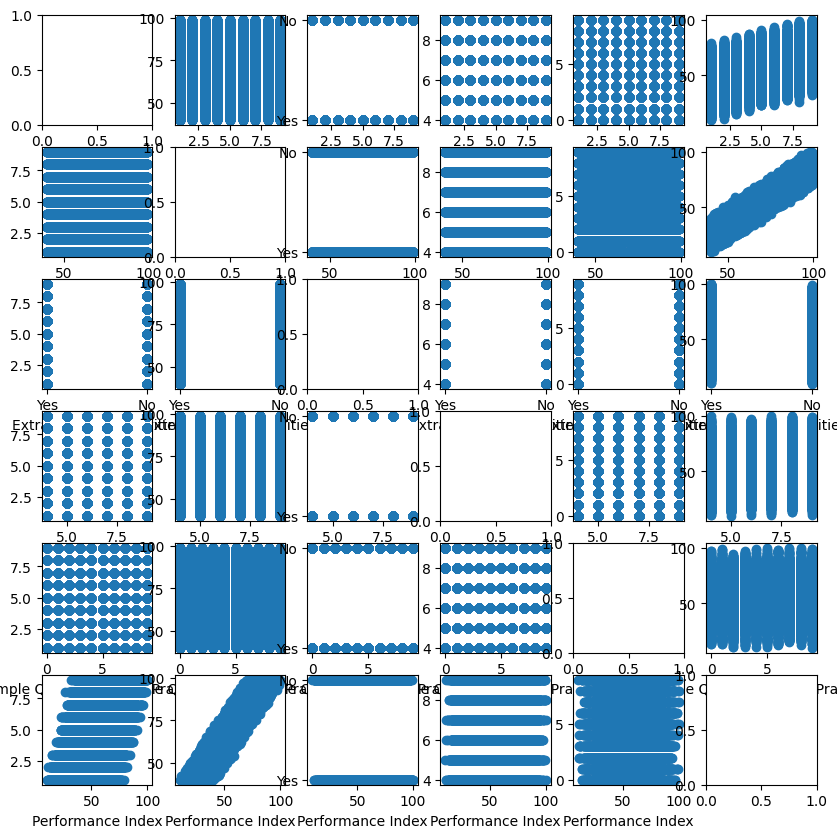

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from ISLP import load_data
from ISLP.models import (ModelSpec as MS , summarize , poly)

data = pd.read_csv('Student_Performance.csv')

ax = plt.subplots(6, 6 , figsize = (10 , 10))[1]

cnt = -1
for p1 in data.columns:
  for p2 in data.columns:
      cnt += 1
      if(p1 == p2):
        continue
      ax[(int)(cnt / 6) , cnt % 6].scatter(data[p1] , data[p2])
      ax[(int)(cnt / 6) , cnt % 6].set_xlabel(p1)

Above is the scatter plot matrix for pairs observation. It can be seen that there are some colinearity in Hours Studied - Perfomance Index, Previous Scores - Performance Index. So based on that, a Multiple Linear Regression using Hours Studied and Previous Scores to predict Performance will be made.

$$\text{Performance Index} = \beta_0 + \beta_1 \cdot \text{Hours Studied} + \beta_2 \cdot \text{Previous Scores} + ϵ$$

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from ISLP import load_data
from ISLP.models import (ModelSpec as MS , summarize , poly)
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('Student_Performance.csv')

train_data , test_data = train_test_split(data , test_size = 0.4 , random_state = 42)

data.columns

x = MS(['Hours Studied' , 'Previous Scores']).fit_transform(train_data)
y = train_data['Performance Index']

model = sm.OLS(y , x)
result = model.fit()
result.summary()

x_test = MS(['Hours Studied' , 'Previous Scores']).fit_transform(test_data)
y_test = result.predict(x_test)

r2 = r2_score(test_data['Performance Index'] , y_test)
#acc = accuracy_score(test_data['Performance Index'] , y_test)
mse = mean_squared_error(test_data['Performance Index'] , y_test)
print('Model\'s r2 score = ' , r2)
#print('Model\'s accuracy score = ' , acc)
print('Model\'s mse = ' , mse)

Model's r2 score =  0.9855947006929847
Model's mse =  5.3631937465886494


In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from ISLP import load_data
from ISLP.models import (ModelSpec as MS , summarize , poly)
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('Student_Performance.csv')

train_data , test_data = train_test_split(data , test_size = 0.4 , random_state = 42)

data.columns

x = MS(data.columns.drop(['Performance Index' , 'Extracurricular Activities'])).fit_transform(train_data)
y = train_data['Performance Index']

model = sm.OLS(y , x)
result = model.fit()
result.summary()

x_test = MS(data.columns.drop(['Performance Index' , 'Extracurricular Activities'])).fit_transform(test_data)
y_test = result.predict(x_test)

r2 = r2_score(test_data['Performance Index'] , y_test)
#acc = accuracy_score(test_data['Performance Index'] , y_test)
mse = mean_squared_error(test_data['Performance Index'] , y_test)
print('Model\'s r2 score = ' , r2)
#print('Model\'s accuracy score = ' , acc)
print('Model\'s mse = ' , mse)

Model's r2 score =  0.9884525095995261
Model's mse =  4.299211490486275


However, If we generate a full variable model, somehow it kinda beats the orginal model.